## Regression

The code below studies the correlation among the variables (slope, age, distance) and the use of bicycle.

The goal is to determine weights for each of them in the final model (how much each variable influentiate in the bicycle usage).

This notebook also contains graphs to compare the potential of bicycle versus non-bicycle trips.

In [2]:
# importing data and auxiliar functions

import saopaulo.sp_grid as gr
import bikescience.distributions as dist
import saopaulo.cycling_potential as cp
from bikescience.slope import plot_slope, plot_slopes, split_route
from shapely.geometry import LineString
import ast

from math import floor

import folium
import pandas as pd
import geopandas as gpd
from statistics import stdev
from ipywidgets import interact_manual, widgets, fixed
from IPython.core.display import display, HTML, clear_output
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import warnings
import requests
import os
warnings.simplefilter('ignore')
import time
import scipy.stats as st

# read routes files and join with general trips file
od_trips = pd.read_csv('../data/sao-paulo/od/OD_2017.csv')
od_trips.columns = [c[: c.index(',')] for c in od_trips.columns]
od_trips.set_index('ID_ORDEM', inplace=True, drop=False)

zone_shp = gpd.read_file('../data/sao-paulo/od/shapes/Zonas_2017_region.shp')
zone_shp.crs = {'init': 'epsg:31983'}  
zone_shp.to_crs(epsg='4326', inplace=True)

od_routes_sp = gpd.read_file('../data/sao-paulo/od/routes/bike_routes_all.shp')
od_routes_sp.crs = {'init': 'epsg:4326'}
od_routes_sp['length'] = od_routes_sp['geometry'].length * 100000

routes_pedestrian = pd.read_csv('../data/sao-paulo/rotas-migracao/routes_pedestrians_to_bikes.csv')
routes_pedestrian.set_index('trip_id', inplace=True, drop=False)
routes_pedestrian = routes_pedestrian.join(other = od_trips, how = 'left')
routes_pedestrian = gpd.GeoDataFrame(routes_pedestrian, crs={'init': 'epsg:4326'}, 
                                     geometry=[LineString(ast.literal_eval(r)) for r in routes_pedestrian.route])
routes_pedestrian['length'] = routes_pedestrian['geometry'].length * 100000

routes_car = pd.read_csv('../data/sao-paulo/rotas-migracao/new_routes_cars_to_bikes.csv')
routes_car.set_index('trip_id', inplace=True, drop=False)
routes_car = routes_car.join(other = od_trips, how = 'left')
routes_car = gpd.GeoDataFrame(routes_car, crs={'init': 'epsg:4326'}, 
                              geometry=[LineString(ast.literal_eval(r)) for r in routes_car.route])
routes_car['length'] = routes_car['geometry'].length * 100000

the_grid = gr.create(n=10, west_offset=-0.15, east_offset=0.23, north_offset=0.19, south_offset=-0.46)

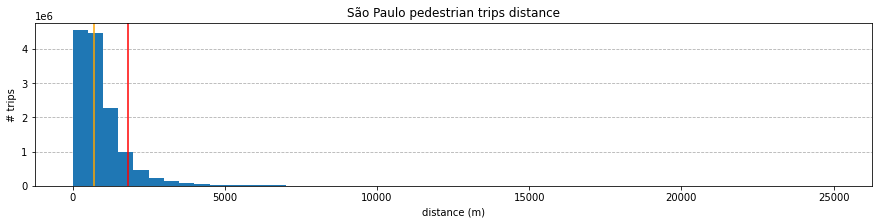

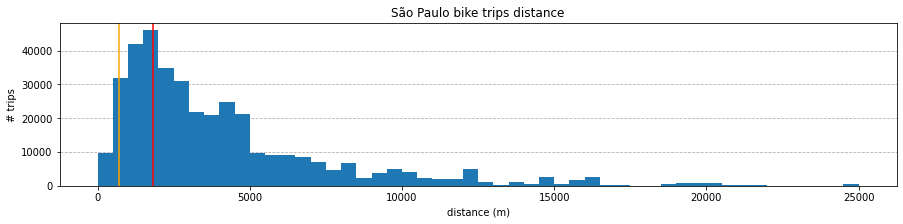

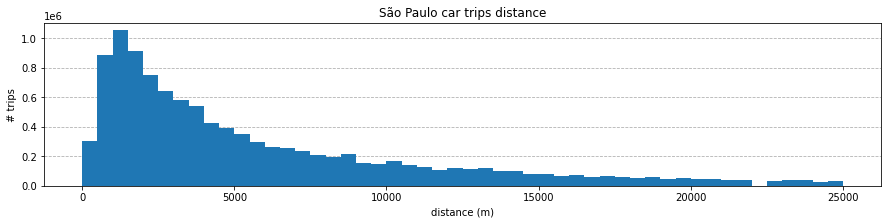

In [5]:
df = routes_pedestrian
def stats (data, value, weights = 'FE_VIA'):
    level = sum(data[weights])/10
    stats = []
    data = data.sort_values(value)
    total = 0
    for _, i in data.iterrows():
        total += i[weights]
        if total >= (len(stats) + 1) * level - 1e-5:
            stats.append(i[value])
    return stats

s = stats(df, 'length')
    
plt.figure(figsize=(15,3))
ax_distance = plt.axes()
ax_distance.set_axisbelow(True)
plt.grid(linestyle='--')
ax_distance.xaxis.grid(False)
plt.hist(bins=50, x=df['length'], 
         weights = df['FE_VIA'],range=(0, 25000))
plt.title('São Paulo pedestrian trips distance')
plt.xlabel('distance (m)')
plt.ylabel('# trips')
plt.axvline(x=s[4],color='orange')
plt.axvline(x=s[8],color='red')
plt.show()    

plt.figure(figsize=(15,3))
ax_distance = plt.axes()
ax_distance.set_axisbelow(True)
plt.grid(linestyle='--')
ax_distance.xaxis.grid(False)
plt.hist(bins=50, x=od_routes_sp['length'], 
         weights = od_routes_sp['FE_VIA'], range=(0, 25000))
plt.title('São Paulo bike trips distance')
plt.xlabel('distance (m)')
plt.ylabel('# trips')
plt.axvline(x=s[4],color='orange')
plt.axvline(x=s[8],color='red')
plt.show() 

df = routes_car
s = stats(df, 'length')
        
plt.figure(figsize=(15,3))
ax_distance = plt.axes()
ax_distance.set_axisbelow(True)
plt.grid(linestyle='--')
ax_distance.xaxis.grid(False)
plt.hist(bins=50, x=df['length'], 
         weights = df['FE_VIA'],range=(0, 25000))
plt.title('São Paulo car trips distance')
plt.xlabel('distance (m)')
plt.ylabel('# trips')
#plt.axvline(x=s[4],color='orange')
#plt.axvline(x=s[8],color='red')
plt.show()    

In [7]:
cp_list = []
for i, r in od_routes_sp.iterrows():
    try:
        pot_d, pot_a, pot_i = cp.cycling_potential_variables(r)
        cp_list.append(['bike', r['ID_ORDEM'], pot_d, pot_a, pot_i, 1, r['FE_VIA']])
    except:
        print(i, '- broken case')

print('-----------------------')

for i, r in routes_pedestrian.iterrows():
    try:
        pot_d, pot_a, pot_i = cp.cycling_potential_variables(r)
        cp_list.append(['pedestrian', i, pot_d, pot_a, pot_i, 0])
    except:
        print(i, '- broken case')
    
print('-----------------------')

for i, r in routes_car.iterrows():
    try:
        pot_d, pot_a, pot_i = cp.cycling_potential_variables(r)
        cp_list.append(['car', i, pot_d, pot_a, pot_i, 0])
    except:
        print(i, '- broken case')

1093 - broken case
1094 - broken case
-----------------------
3604.0 - broken case
3605.0 - broken case
4798.0 - broken case
4799.0 - broken case
4802.0 - broken case
4803.0 - broken case
6716.0 - broken case
6717.0 - broken case
58435.0 - broken case
58436.0 - broken case
58437.0 - broken case
58438.0 - broken case
61341.0 - broken case
61342.0 - broken case
76031.0 - broken case
76032.0 - broken case
85194.0 - broken case
85195.0 - broken case
85196.0 - broken case
85197.0 - broken case
86627.0 - broken case
86628.0 - broken case
98668.0 - broken case
98669.0 - broken case
108235.0 - broken case
108236.0 - broken case
108237.0 - broken case
108238.0 - broken case
108247.0 - broken case
108248.0 - broken case
108249.0 - broken case
110315.0 - broken case
110316.0 - broken case
111532.0 - broken case
111533.0 - broken case
122637.0 - broken case
122638.0 - broken case
167497.0 - broken case
167498.0 - broken case
174304.0 - broken case
174305.0 - broken case
180216.0 - broken case
1802

In [10]:
columns = ['modal', 'trip_id', 'distance_potential', 'age_potential', 'inclination_potential', 'is_bike', 'fe_via']
df_cycling_potential = pd.DataFrame(data = cp_list, columns = columns)

display (df_cycling_potential)

,modal,trip_id,distance_potential,age_potential,inclination_potential,is_bike,fe_via
0,bike,450.0,0.907533,0.045080,0.303321,1,45.993065
1,bike,451.0,0.826459,0.045080,0.653719,1,45.993065
2,bike,452.0,0.907533,0.045080,0.303321,1,45.993065
3,bike,453.0,0.826459,0.045080,0.653719,1,45.993065
4,bike,454.0,0.823677,0.045080,0.577235,1,45.993065
...,...,...,...,...,...,...,...
100766,car,183070.0,0.003542,0.929678,0.017430,0,NaN
100767,car,183073.0,0.004357,0.929678,0.017407,0,NaN
100768,car,183074.0,0.015805,0.929678,0.032250,0,NaN
100769,car,183076.0,0.005924,0.075749,0.007084,0,NaN


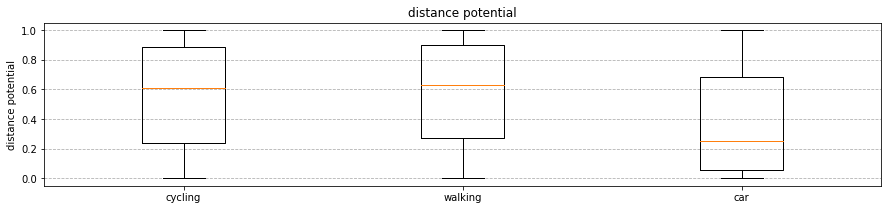

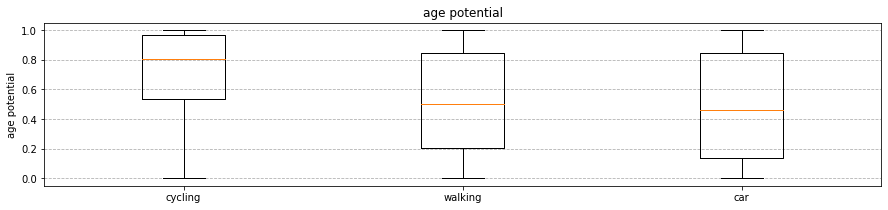

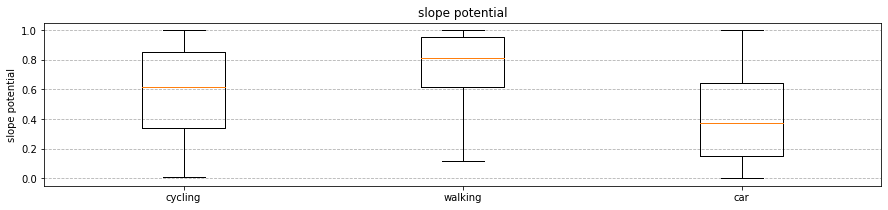

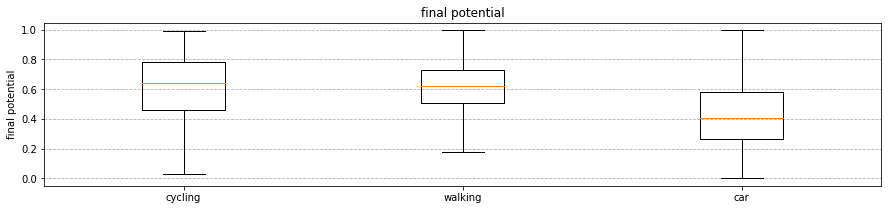

In [11]:
plt.figure(figsize=(15,3))
ax_distance = plt.axes()
ax_distance.set_axisbelow(True)
plt.grid(linestyle='--')
ax_distance.xaxis.grid(False)
plt.boxplot([df_cycling_potential.loc[df_cycling_potential['modal'] == 'bike']['distance_potential'],
             df_cycling_potential.loc[df_cycling_potential['modal'] == 'pedestrian']['distance_potential'],
             df_cycling_potential.loc[df_cycling_potential['modal'] == 'car']['distance_potential']],
           showfliers=False)
plt.xticks([1, 2, 3], ['cycling', 'walking', 'car'])
plt.title('distance potential')
plt.ylabel('distance potential')
plt.show()

plt.figure(figsize=(15,3))
ax_distance = plt.axes()
ax_distance.set_axisbelow(True)
plt.grid(linestyle='--')
ax_distance.xaxis.grid(False)
plt.boxplot([df_cycling_potential.loc[df_cycling_potential['modal'] == 'bike']['age_potential'],
             df_cycling_potential.loc[df_cycling_potential['modal'] == 'pedestrian']['age_potential'],
             df_cycling_potential.loc[df_cycling_potential['modal'] == 'car']['age_potential']],
           showfliers=False)
plt.xticks([1, 2, 3], ['cycling', 'walking', 'car'])
plt.title('age potential')
plt.ylabel('age potential')
plt.show()

plt.figure(figsize=(15,3))
ax_distance = plt.axes()
ax_distance.set_axisbelow(True)
plt.grid(linestyle='--')
ax_distance.xaxis.grid(False)
plt.boxplot([df_cycling_potential.loc[df_cycling_potential['modal'] == 'bike']['inclination_potential'],
             df_cycling_potential.loc[df_cycling_potential['modal'] == 'pedestrian']['inclination_potential'],
             df_cycling_potential.loc[df_cycling_potential['modal'] == 'car']['inclination_potential']],
           showfliers=False)
plt.xticks([1, 2, 3], ['cycling', 'walking', 'car'])
plt.title('slope potential')
plt.ylabel('slope potential')
plt.show()

df_cycling_potential['total'] = (df_cycling_potential['inclination_potential'] + 
                                 df_cycling_potential['age_potential'] + 
                                 df_cycling_potential['distance_potential'])/3

plt.figure(figsize=(15,3))
ax_distance = plt.axes()
ax_distance.set_axisbelow(True)
plt.grid(linestyle='--')
ax_distance.xaxis.grid(False)
plt.boxplot([df_cycling_potential.loc[df_cycling_potential['modal'] == 'bike']['total'],
             df_cycling_potential.loc[df_cycling_potential['modal'] == 'pedestrian']['total'],
             df_cycling_potential.loc[df_cycling_potential['modal'] == 'car']['total']],
           showfliers=False)
plt.xticks([1, 2, 3], ['cycling', 'walking', 'car'])
plt.title('final potential')
plt.ylabel('final potential')
plt.show()

In [12]:
#fmap = gr.map_around_sp(the_grid=None,zoom=11,plot_grid=False)

#for _, r in od_routes_sp.iterrows():
#    p = cp.partial_cycling_potential ('distance', r['SEXO'], r['length'])
#    if p > .8:
#        color='#2acf06'
#    elif p > .6:
#        color='#8ae736'
#    elif p > .4:
#        color='ecff1e'
#    elif p > .2:
#        color='#f7d202'
#    else:
#        color='#ff1e1e'
#    folium.GeoJson(r['geometry'], 
#                   control=False, 
#                   style_function=lambda style, color_p=color :{'color': color_p, 'weight': 1}).add_to(fmap)
    
#display(fmap)

### Linear regression to estimate values

In [13]:
import statsmodels.api as sm

df_cycling_potential['slope_potential'] = df_cycling_potential['inclination_potential']
X = df_cycling_potential[['distance_potential', 'age_potential', 'slope_potential']]
y = df_cycling_potential['is_bike']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                is_bike   R-squared (uncentered):                   0.019
Model:                            OLS   Adj. R-squared (uncentered):              0.019
Method:                 Least Squares   F-statistic:                              639.0
Date:                Fri, 03 Mar 2023   Prob (F-statistic):                        0.00
Time:                        22:01:17   Log-Likelihood:                          76700.
No. Observations:              100771   AIC:                                 -1.534e+05
Df Residuals:                  100768   BIC:                                 -1.534e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
distance_potential     0.0099      0.001      9.390      0.000       0.008       0.012
age_potential          0.0219      0.001     25.661      0.000       0.020       0.024
slope_potential       -0.0041      0.001     -4.045      0.000      -0.006      -0.002
==============================================================================
Omnibus:                   139997.227   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22428587.972
Skew:                           8.525   Prob(JB):                         0.00
Kurtosis:                      74.070   Cond. No.                         3.68
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
display(model.pvalues)

distance_potential     6.132935e-21
age_potential         9.387670e-145
slope_potential        5.238954e-05
dtype: float64